# A model in development

I am building a model of Ca<sup>2+</sup> ion dynamics in a hexagonal lattice representing a sheet of cells.

I wanted to document and display the process of building such a model.

### Where to start

##### Hexagons
Why hexagons? Cells often forms sheets. Looking from the side, the cells appear as tall, thin rectangles. Looking from the top, the cells look hexagonal in shape. Hexagons are the most efficient shape that cells can take when tightly packed. Cells will almost never be precisely regular hexagons, but for a model it's good enough. As an aside, [this video](https://youtu.be/thOifuHs6eY) about hexagons is excellent.

##### Finding a library
There are some really great tools out there for building models using hexagons. I did a quick survey, and the one by [Red Blob Games](https://www.redblobgames.com/grids/hexagons/) topped the list for a few reasons.
- I wanted to use Python. It is open source, widely used in research and in industry, and the language with which I have most experience.
- I wanted excellent documentation.

Please go and check it out. It is fabulous.

##### A vague plan
What do I need from my model? I am going to need a finite hexagonal lattice, size not too important at this stage. I am going to need to have multiple variables which have a given value at each point of the lattice. These variables are also going to vary in time. Each hex is going to need to communicate with neighbouring hexs.

The precise details of the model are a bit fuzzy at this point. There's going to be some differential equations: they are going to be a numerical approximation of partial DEs, and we might have an added bit of stochasticty thrown in for funsies.

In [1]:
from lib import *

### Building the model output

I first wanted to get my hexagons down on the page.

I used to start by building the substance of the model, and worry about how I would display the output later. I still think that definitely works as a methodology. But not I prefer to build the display or the output first. That way I can easily update people on progress, even if the model doesn't do anything useful yet.

So, I am first going to define my layout. This determines how the hexagons will be displayed on the page. I think strictly speaking this doesn't need to be done here. And perhaps ought not be done this early. But my layout is unlikely to change, so here we go.

In [2]:
from functions import create_layout_from_dict

layout_dict = {
    "layout_str": 'pointy',
    "center_x": 0,
    "center_y": 0,
    "radius": 10.0
}
pointy = create_layout_from_dict(layout_dict)

Similarly I will define a hexagonal lattice of a given size. In reality I will be creating multiple stripes, and here I define the size of each stripe. I started with a paralellogram because it doesn't require encoding an 'offset'. But I think I prefer the way the rectangle looks.

In [3]:
import numpy as np

# set up hexagonal grid with (q,r,s) coordinates
hex_x_N = 65
hex_y_N = 5
hex_array = []
# PARALLELOGRAM MAP
# for x in range(hex_x_N):
#     for y in range(hex_y_N):
#         hex_array.append(Hex(-x-y,y,x))

# RECTANGLE MAP
for y in range(hex_y_N):
    y_offset = int(np.floor(y/2))
    for x in range(-y_offset, hex_x_N - y_offset):
        hex_array.append(Hex(-x-y,y,x))

And then we plot them.

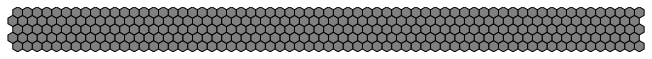

In [4]:
%matplotlib inline

from plot import plot_hexes

plot_hexes(hex_array, (hex_x_N,hex_y_N), pointy, 12, 'show')

Ace. I made some hexagons.

### Colour implies value

I am going to want the colour of my hexagons to change according to the value of some variable.

This seems like a simple statement but it raises the interesting question of _how to store such a variable_. I had a long internal debate about arrays of dicts versus dicts of arrays. I didn't think about it as much as I should have done, or asked for help. (Not true I did a cursory search of stackexchange and didn't find a simple answer.)

Anyway I chose dicts of arrays. What do I mean by this?
Storing variables representing a lattice of squares is easy: the n-dimensional array. Or really the 3-dimensional array. Dimension 1 = x-position, dimension 2 = y-position, dimension 3 = time. And it's all rectangular and fits nicely in computer memory. A bit of additional thinking might be required if you need to access the memory super fast, and do a-typical neighbour comparisons, but still, super easy.

Hexagons have 6 neighbours. And don't fit nicely in rectangles. However, hash tables offer a nice solution, which in Python means dicts. You pass the dict a hex, and get a value in return. So simple it's beautiful. The Red Blob Games library has hexs saved in their own little collection, so everything is nicely set-up.

I decided to store an array of values for each hex, representing all possible timepoints. This is either the best way to do it, or highly inefficient in terms of data storage. I can't work out which it is.

<tt>matplotlib</tt> colormaps are baffling. I use them often, and am still confused every time. Generally with wrangling I get them to do what I want but, urgh.

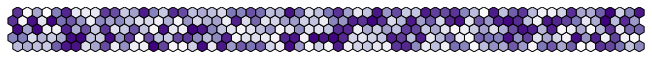

In [5]:
from functions import allocate_var_dict
from models import random_pulsing
from plot import plot_var_by_color

timepoint_N = 960
value_range = (0,100)
value = 20

var_dict = allocate_var_dict(hex_array, timepoint_N, value)
var_dict = random_pulsing(var_dict, hex_array, timepoint_N, value_range)

plot_var_by_color(var_dict, 0, hex_array, (hex_x_N,hex_y_N), pointy, 12, 'show')

### Let's get animated

The <tt>matplotlib FuncAnimation</tt> is great, and I think pretty straight forward. I love their examples.

I sometimes find sampling a variable to reduce video size little difficult to get right, which gets even worse when you want to make sure the video loops. Doing it for the vine.

The other consideration here, is that I want my hexs to do something moderately interesting but not difficult to implement. So I give each hex a random value and a direction (up or down). I tell each hexs to change their value at each time point in the appropriate direction. If the hex's value gets to a give maximum or minimum, change direction. I call this random pulsing. Loosely speaking it has many features of the final model, but doesn't have the added complications of neighbourhood communication or variable communication.

Additional challenge, setting up some fun initial conditions.

In [6]:
from plot import animate_var_by_color

timepoint_N = 960
value_range = (0,100)
value = 20

var_dict = allocate_var_dict(hex_array, timepoint_N, value)
var_dict = random_pulsing(var_dict, hex_array, timepoint_N, value_range)

animate_var_by_color(var_dict, timepoint_N, hex_array, (hex_x_N,hex_y_N), pointy, 12, 'show')

TypeError: animate_var_by_color() missing 1 required positional argument: 'file_str'

### Diffusion

In [ ]:
from functions import initialize_column_of_hexes_to_value
from models import diffusion
from plot import animate_var_by_color

timepoint_N = 960

var_dict = allocate_var_dict(hex_array, timepoint_N, 0)
var_dict = initialize_column_of_hexes_to_value(var_dict, hex_array, 100, 0, 4, pointy)
var_dict = initialize_column_of_hexes_to_value(var_dict, hex_array, 100, 1, 4, pointy)
var_dict = initialize_column_of_hexes_to_value(var_dict, hex_array, 100, 0.25, 2.5, pointy)
var_dict = initialize_column_of_hexes_to_value(var_dict, hex_array, 100, 0.5, 3, pointy)
var_dict = initialize_column_of_hexes_to_value(var_dict, hex_array, 100, 0.75, 2.5, pointy)

var_dict = diffusion(var_dict, hex_array, timepoint_N)

# animate_var_by_color(var_dict, timepoint_N, hex_array, (hex_x_N,hex_y_N), pointy, 12, 'show')